In [1]:
import sys
sys.path.insert(1, '../')

from spiral import (
    IntegrateAndFireSoma,
    LeakyMembrane,
    ExponentialDepolaristicMembrane,
    AdaptiveMembrane
)

In [2]:
from spiral.analysis import FunctionGenerator
I = FunctionGenerator.generate(200, shape=(3,),
        baseline={0:20, 70:130, 85:0, 100:130, 150:20},
        noise={100:1},
        population_noise={0:10.},
)

In [6]:
from spiral.analysis import Simulator
import matplotlib.pyplot as plt
from matplotlib_dashboard import MatplotlibDashboard

def simulate_and_plot(n, title='', adaptive=False):
    s = Simulator(n.progress)
    n.reset()
    s.simulate(inputs={'direct_input': I}, times=200)
    plt.figure(figsize=(14,5))
    md = MatplotlibDashboard([
        ['S','U','W' if adaptive else None],
        ['A','U','I']
    ], hspace=.5, wspace=.3)
    n.plot_spikes(md['S'])
    n.plot_population_activity(md['A'])
    n.plot_potential(md['U'])
    if adaptive:
        n.plot_adaptation_current(md['W'])
    md['I'].plot(I, color='blue', alpha=.2)
    md['I'].plot(I.mean(axis=1), color='blue')
    md['U'].set_title(title)
    plt.show()

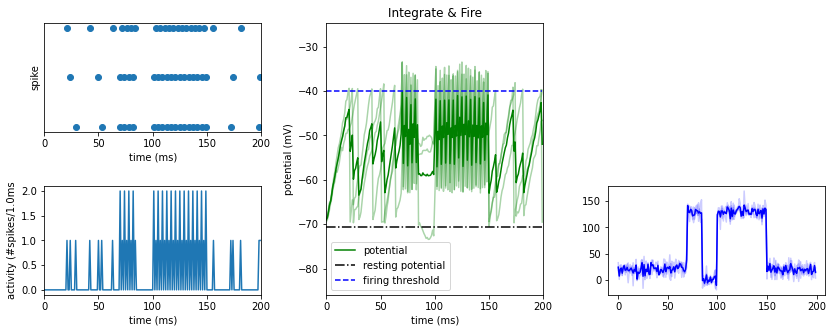

In [7]:
IF = IntegrateAndFireSoma

n = IF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    analyzable=True,
)

simulate_and_plot(n, 'Integrate & Fire')

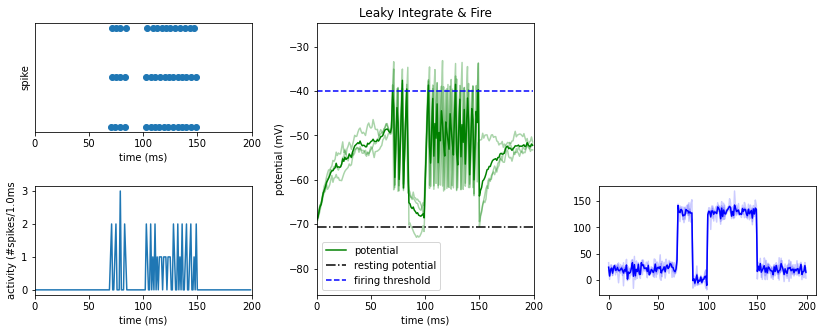

In [8]:
LIF = \
    LeakyMembrane(
        IntegrateAndFireSoma
    )

n = LIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    analyzable=True,
)

simulate_and_plot(n, "Leaky Integrate & Fire")

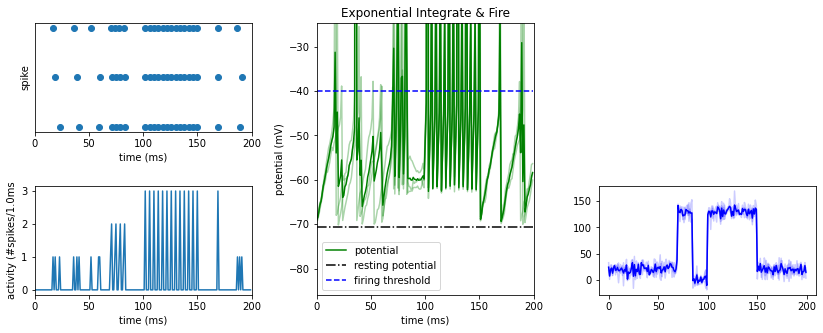

In [9]:
EIF = \
    ExponentialDepolaristicMembrane(
        IntegrateAndFireSoma
    )

n = EIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    sharpness=1.,
    analyzable=True,
)

simulate_and_plot(n, "Exponential Integrate & Fire")

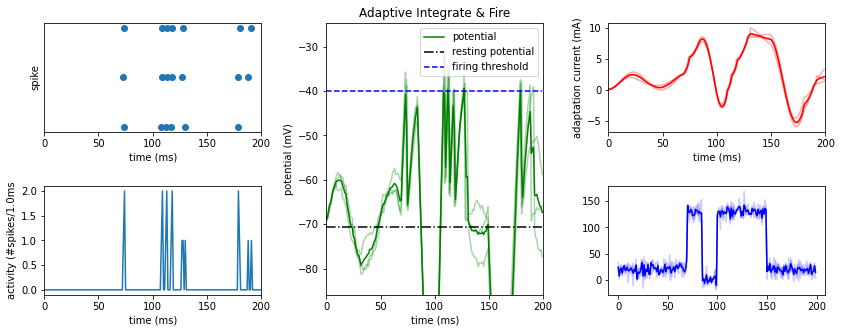

In [11]:
AIF = \
    AdaptiveMembrane(
        IntegrateAndFireSoma
    )

n = AIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    spike_triggered_adaptation=1.,
    tau_adaptation=250.,
    analyzable=True,
)

simulate_and_plot(n, "Adaptive Integrate & Fire", True)

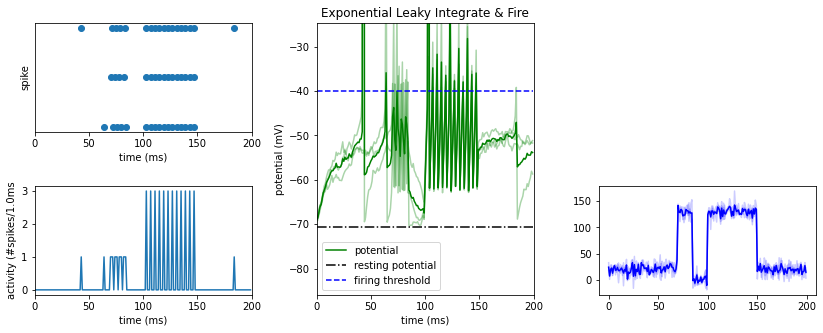

In [13]:
ELIF = \
    ExponentialDepolaristicMembrane(
        LeakyMembrane(
            IntegrateAndFireSoma
        )
    )

n = ELIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    sharpness=1.,
    analyzable=True,
)

simulate_and_plot(n, "Exponential Leaky Integrate & Fire")

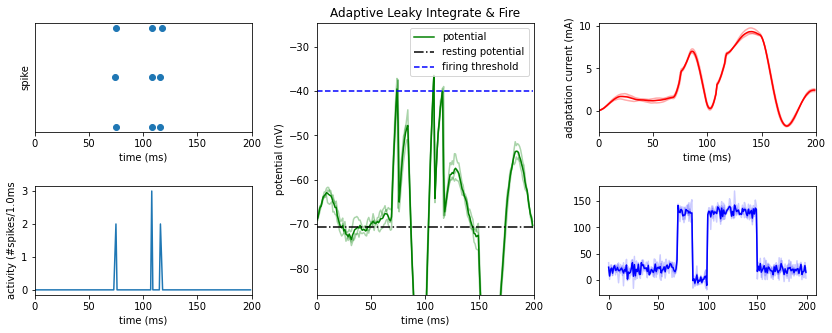

In [14]:
ALIF = \
    AdaptiveMembrane(
        LeakyMembrane(
            IntegrateAndFireSoma
        )
    )

n = ALIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    spike_triggered_adaptation=1.,
    analyzable=True,
    tau_adaptation=250.,
)

simulate_and_plot(n, "Adaptive Leaky Integrate & Fire", True)

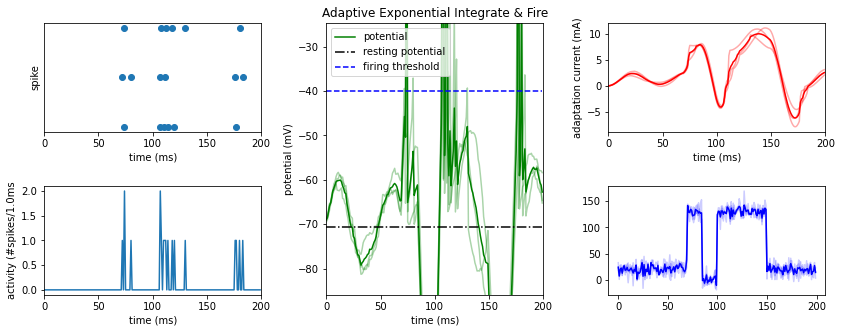

In [15]:
ALIF = \
    AdaptiveMembrane(
        ExponentialDepolaristicMembrane(
            IntegrateAndFireSoma
        )
    )

n = ALIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    sharpness=1.,
    spike_triggered_adaptation=1.,
    analyzable=True,
    tau_adaptation=250.,
)

simulate_and_plot(n, "Adaptive Exponential Integrate & Fire", True)

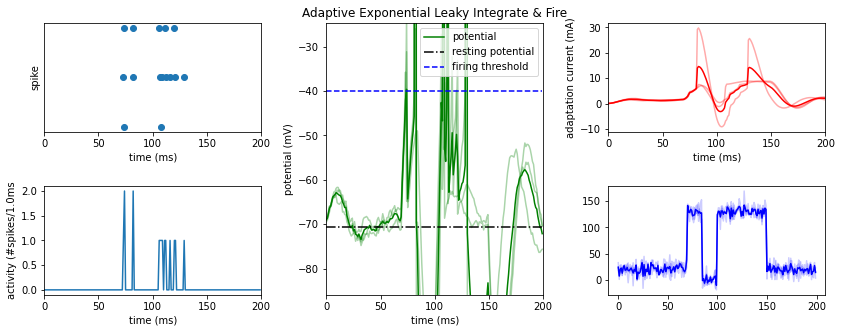

In [18]:
AELIF = \
    AdaptiveMembrane(
        ExponentialDepolaristicMembrane(
            LeakyMembrane(
                IntegrateAndFireSoma
            )
        )
    )

n = AELIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    sharpness=1.,
    spike_triggered_adaptation=1.,
    tau_adaptation=250.,
    analyzable=True,
)

simulate_and_plot(n, "Adaptive Exponential Leaky Integrate & Fire", True)

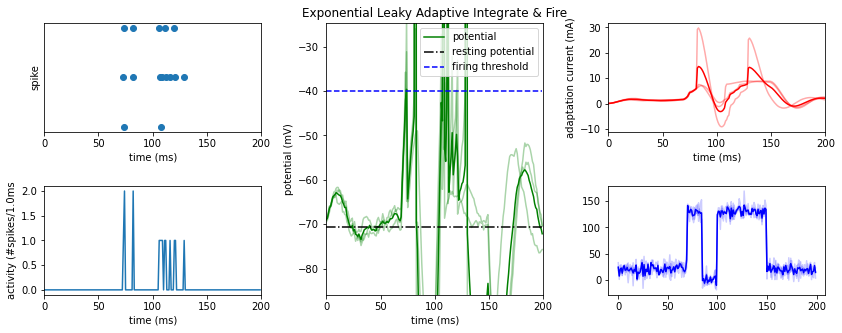

In [19]:
ELAIF = \
    ExponentialDepolaristicMembrane(
        LeakyMembrane(
            AdaptiveMembrane(
                IntegrateAndFireSoma
            )
        )
    )

n = ELAIF(
    name='neuronsA',
    shape=(3,),
    tau=15.,
    dt=1.,
    sharpness=1.,
    spike_triggered_adaptation=1.,
    tau_adaptation=250.,
    analyzable=True,
)

simulate_and_plot(n, "Exponential Leaky Adaptive Integrate & Fire", True)